# Y.Music

# Konten <a id='back'></a>

* [Pendahuluan](#intro)
* [Tahap 1. Ikhtisar Data](#data_review)
    * [Kesimpulan](#data_review_conclusions)
* [Tahap 2. Pra-pemrosesan data](#data_preprocessing)
    * [2.1 Gaya Penulisan Judul](#header_style)
    * [2.2 Nilai-Nilai yang Hilang](#missing_values)
    * [2.3 Duplikat](#duplicates)
    * [2.4 Kesimpulan](#data_preprocessing_conclusions)
* [Tahap 3. Menguji Hipotesis](#hypotheses)
    * [3.1 Hipotesis 1: aktivitas pengguna di dua kota](#activity)
    * [3.2 Hipotesis 2: preferensi musik pada hari Senin dan Jumat](#week)
    * [3.3 Hipotesis 3: preferensi genre di kota Springfield dan Shelbyville](#genre)
* [Temuan](#end)

## Pendahuluan <a id='intro'></a>
Setiap kali kita melakukan penelitian, kita perlu merumuskan hipotesis yang kemudian dapat kita uji. Terkadang kita menerima hipotesis ini; tetapi terkadang kita juga menolaknya. Untuk membuat keputusan yang tepat, sebuah bisnis harus dapat memahami apakah asumsi yang dibuatnya benar atau tidak.

Dalam proyek kali ini, Anda akan membandingkan preferensi musik di kota Springfield dan Shelbyville. Anda akan mempelajari data Y.Music yang sebenarnya untuk menguji hipotesis di bawah ini dan membandingkan perilaku pengguna di kedua kota ini.

### Tujuan: 
Menguji tiga hipotesis:
1. Aktivitas pengguna berbeda-beda tergantung pada hari dan kotanya.
2. Pada senin pagi, penduduk Springfield dan Shelbyville mendengarkan genre yang berbeda. Hal ini juga ini juga berlaku untuk Jumat malam.
3. Pendengar di Springfield dan Shelbyville memiliki preferensi yang berbeda. Di Springfield, mereka lebih suka musik pop, sementara Shelbyville, musik rap memiliki lebih banyak penggemar.

### Tahapan
Data tentang perilaku pengguna disimpan dalam berkas `/datasets/music_project_en.csv`. Tidak ada informasi tentang kualitas data, jadi Anda perlu memeriksanya lebih dahulu sebelum menguji hipotesis.

Pertama, Anda akan mengevaluasi kualitas data dan melihat apakah masalahnya signifikan. Kemudian, selama pra-pemrosesan data, Anda akan mencoba memperhitungkan masalah yang paling serius.
 
Proyek ini akan terdiri dari tiga tahap:
 1. Ikhtisar Data
 2. Pra-pemrosesan Data
 3. Menguji Hipotesis

 
[Kembali ke Daftar Isi](#back)

## Tahap 1. Ikhtisar Data <a id='data_review'></a>

Buka data di Y.Music lalu jelajahi data yang ada di sana.

Anda akan membutuhkan `Pandas`, jadi Anda harus mengimpornya.

In [1]:
# mengimpor Pandas
import pandas as pd
import seaborn as sns

Baca file `music_project_en.csv` dari folder `/datasets/` lalu simpan di variabel `df`:

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


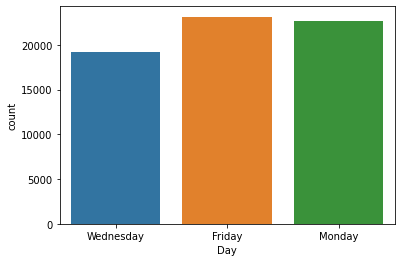

In [13]:
sns.countplot(df['Day']);

In [3]:
df = pd.read_csv(r'/datasets/music_project_en.csv')

In [16]:
# membaca berkas dan menyimpannya ke df

Tampilkan 10 baris tabel pertama:

In [17]:
# memperoleh 10 baris pertama dari tabel df

Memperoleh informasi umum tentang tabel dengan satu perintah:

In [18]:
# memperoleh informasi umum tentang data di df

Tabel ini berisi tujuh kolom. Semuanya menyimpan tipe data yang sama, yaitu: `object`.

Berdasarkan dokumentasi:
- `'userID'` — pengenal pengguna
- `'Track'` — judul trek
- `'artist'` — nama artis
- `'genre'`
- `'City'` — kota tempat pengguna berada
- `'time'` — lama waktu lagu tersebut dimainkan
- `'Day'` — nama hari

Kita dapat melihat tiga masalah dengan gaya penulisan nama kolom:
1. Beberapa nama huruf besar, beberapa huruf kecil.
2. Ada penggunaan spasi pada beberapa nama.
3. `Coba cari masalah ketiga dan jelaskan di sini`.

Jumlah nilai kolom berbeda. Ini berarti data mengandung nilai yang hilang.


### Kesimpulan <a id='data_review_conclusions'></a> 

Setiap baris dalam tabel menyimpan data pada judul trek yang diputar. Beberapa kolom menggambarkan lagu itu sendiri: judul trek, artis, dan genre. Sisanya menyampaikan informasi tentang pengguna: kota asal mereka, waktu mereka memutar lagu.

Jelas bahwa data tersebut cukup untuk menguji hipotesis. Namun, ada nilai-nilai yang hilang.

Selanjutnya, kita perlu melakukan pra-pemrosesan data terlebih dahulu.

[Kembali ke Daftar Isi](#back)

## Tahap 2. Pra-pemrosesan Data <a id='data_preprocessing'></a>
Perbaiki format pada judul kolom dan atasi nilai yang hilang. Kemudian, periksa apakah ada duplikat dalam data.

### Gaya Penulisan Judul <a id='header_style'></a>
Tampilkan judul kolom:


In [5]:
# daftar nama kolom di tabel df

Ubah nama kolom sesuai dengan aturan gaya penulisan yang baik:
* Jika nama memiliki beberapa kata, gunakan snake_case
* Semua karakter harus menggunakan huruf kecil
* Hapus spasi

In [6]:
# mengganti nama kolom

Periksa hasilnya. Tampilkan nama kolom sekali lagi:

In [7]:
# mengecek hasil: daftar nama kolom

[Kembali ke Daftar Isi](#back)

### Nilai-Nilai yang Hilang <a id='missing_values'></a>
Pertama, temukan jumlah nilai yang hilang dalam tabel. Untuk melakukannya, gunakan dua metode `Pandas`:

In [8]:
# menghitung nilai yang hilang

Tidak semua nilai yang hilang berpengaruh terhadap penelitian. Misalnya, nilai yang hilang dalam `track` dan `artist` tidak begitu penting. Anda cukup menggantinya dengan penanda yang jelas.
Namun nilai yang hilang dalam `'genre'` dapat memengaruhi perbandingan preferensi musik di Springfield dan Shelbyville. Dalam kehidupan nyata, sangatlah berguna untuk mempelajari alasan mengapa data tersebut hilang dan mencoba memperbaikinya. Tetapi kita tidak memiliki kesempatan itu dalam proyek ini. Jadi Anda harus:
* Isi nilai yang hilang ini dengan sebuah penanda
* Evaluasi seberapa besar nilai yang hilang dapat memengaruhi perhitungan Anda

Ganti nilai yang hilang pada `'track'`, `'artist'`, dan `'genre'` dengan string `'unknown'`. Untuk melakukannya, buat list `columns_to_replace`, lakukan *loop* dengan `for`, dan ganti nilai yang hilang di setiap kolom:

In [9]:
# loop nama kolom dan ganti nilai yang hilang dengan 'unknown'

Pastikan tidak ada tabel lagi yang berisi nilai yang hilang. Hitung kembali nilai yang hilang.

In [10]:
# menghitung nilai yang hilang

[Kembali ke Daftar Isi](#back)

### Duplikat <a id='duplicates'></a>
Temukan jumlah duplikat eksplisit dalam tabel menggunakan satu perintah:

In [11]:
# menghitung duplikat eksplisit

Panggil metode `Pandas` untuk menghapus duplikat eksplisit:

In [12]:
# menghapus duplikat eksplisit

Hitung duplikat eksplisit sekali lagi untuk memastikan Anda telah menghapus semuanya:

In [13]:
# memeriksa duplikat

Sekarang hapus duplikat implisit di kolom `genre`. Misalnya, nama genre dapat ditulis dengan cara yang berbeda. Kesalahan seperti ini juga akan memengaruhi hasil.

Tampilkan daftar nama genre yang unik, urutkan berdasarkan abjad. Untuk melakukannya:
* Ambil kolom DataFrame yang dimaksud
* Terapkan metode pengurutan untuk itu
* Untuk kolom yang diurutkan, panggil metode yang akan menghasilkan semua nilai kolom yang unik

In [14]:
# melihat nama genre yang unik

Lihat melalui *list* untuk menemukan duplikat implisit dari genre `hiphop`. Ini bisa berupa nama yang ditulis secara salah atau nama alternatif dari genre yang sama.

Anda akan melihat duplikat implisit berikut:
* `hip`
* `hop`
* `hip-hop`

Untuk menghapusnya, gunakan fungsi `replace_wrong_genres()` dengan dua parameter:
* `wrong_genres=` — daftar duplikat
* `correct_genre=` — string dengan nilai yang benar

Fungsi harus mengoreksi nama dalam kolom `'genre'` dari tabel `df`, yaitu mengganti setiap nilai dari daftar `wrong_genres` dengan nilai dalam `correct_genre`.

In [15]:
# fungsi untuk mengganti duplikat implisit

Panggil `replace_wrong_genres()` dan berikan argumennya sehingga ia menghapus duplikat implisit (`hip`, `hop`, dan `hip-hop`) dan menggantinya dengan `hiphop`:

In [16]:
# menghapus duplikat implisit

Pastikan nama duplikat telah dihapus. Tampilkan daftar nilai unik dari kolom `'genre'`:

In [17]:
# memeriksa duplikat implisit

[Kembali ke Daftar Isi](#back)

### Kesimpulan <a id='data_preprocessing_conclusions'></a>
Kita mendeteksi tiga masalah dengan data:

- Gaya penulisan judul yang salah
- Nilai-nilai yang hilang
- Duplikat eksplisit dan implisit

Judulnya pun sekarang telah dibersihkan untuk mempermudah pemrosesan tabel.
Semua nilai yang hilang telah diganti dengan `'unknown'`. Tapi kita masih harus melihat apakah nilai yang hilang dalam `'genre'` akan memengaruhi perhitungan kita.

Tidak adanya duplikat akan membuat hasil lebih tepat dan lebih mudah dipahami.

Sekarang kita dapat melanjutkan ke pengujian hipotesis.

[Kembali ke Daftar Isi](#back)

## Tahap 3. Menguji Hipotesis <a id='hypotheses'></a>

### Hipotesis 1: Membandingkan Perilaku Pengguna di Dua Kota <a id='activity'></a>

Menurut hipotesis pertama, pengguna dari Springfield dan Shelbyville memiliki perbedaan perilaku dalam mendengarkan musik. Pengujian ini menggunakan data pada hari: Senin, Rabu, dan Jumat.

* Pisahkan pengguna ke dalam kelompok berdasarkan kota.
* Bandingkan berapa banyak lagu yang dimainkan setiap kelompok pada hari Senin, Rabu, dan Jumat.

Untuk latihan, lakukan setiap perhitungan secara terpisah.

Evaluasi aktivitas pengguna di setiap kota. Kelompokkan data berdasarkan kota dan temukan jumlah lagu yang diputar di setiap kelompok.



In [18]:
# Menghitung lagu yang diputar di setiap kota

Springfield memiliki lebih banyak lagu yang dimainkan daripada Shelbyville. Namun bukan berarti warga Springfield lebih sering mendengarkan musik. Kota ini lebih besar, dan memiliki lebih banyak pengguna.

Sekarang kelompokkan data menurut hari dan temukan jumlah lagu yang diputar pada hari Senin, Rabu, dan Jumat.

In [19]:
# Menghitung trek yang diputar pada masing-masing hari

Rabu adalah hari paling tenang secara keseluruhan. Tetapi jika kita mempertimbangkan kedua kota secara terpisah, kita mungkin akan memiliki kesimpulan yang berbeda.

Anda telah melihat cara kerja pengelompokan berdasarkan kota atau hari. Sekarang tulis fungsi yang akan dikelompokkan berdasarkan keduanya.

Buat fungsi `number_tracks()` untuk menghitung jumlah lagu yang diputar untuk hari dan kota tertentu. Ini akan membutuhkan dua parameter:
* nama hari
* nama kota

Dalam fungsi, gunakan variabel untuk menyimpan baris dari tabel asli, di mana:
  *  Nilai kolom `'day'` sama dengan parameter `day`
  * Nilai kolom `'city'` sama dengan parameter `city`

Terapkan pemfilteran berurutan dengan pengindeksan logika.

Kemudian hitung nilai kolom `'user_id'` pada tabel yang dihasilkan. Simpan hasilnya ke variabel baru. Kembalikan variabel ini dari fungsi.

In [20]:
# <membuat fungsi number_tracks()>
# Kita akan mendeklarasikan sebuah fungsi dengan dua parameter: day=, city=.
# Biarkan variabel track_list menyimpan baris df di mana
# nilai di kolom 'day' sama dengan parameter day= dan, pada saat yang sama,
# nilai pada kolom 'city' sama dengan parameter city= (terapkan pemfilteran berurutan
# dengan pengindeksan logis).
# Biarkan variabel track_list_count menyimpan jumlah nilai kolom 'user_id' pada track_list
# (temukan dengan metode count()).
# Biarkan fungsi menghasilkan jumlah: nilai track_list_count.

# Fungsi menghitung lagu yang diputar untuk kota dan hari tertentu.
# Pertama-tama ia akan mengambil baris dengan hari yang diinginkan dari tabel,# kemudian memfilter baris hasilnya dengan kota yang dimaksud,
# kemudian mencari jumlah nilai 'user_id' pada tabel yang difilter,
# kemudian menghasilkan jumlah tersebut.
# Untuk melihat apa yang dihasilkan, kemas pemanggilan fungsi pada print().

Panggil `number_tracks()` enam kali dan ubahlah nilai parameternya, sehingga Anda bisa mengambil data di kedua kota untuk masing-masing hari tersebut.

In [21]:
# jumlah lagu yang diputar di Springfield pada hari Senin

In [22]:
# jumlah lagu yang diputar di Shelbyville pada hari Senin

In [23]:
#  jumlah lagu yang diputar di Springfield pada hari Rabu

In [24]:
#  jumlah lagu yang diputar di Shelbyville pada hari Rabu

In [25]:
# jumlah lagu yang diputar di Springfield pada hari Jumat

In [26]:
# jumlah lagu yang diputar di Shelbyville pada hari Jumat

Gunakan `pd.DataFrame` untuk membuat tabel, di mana
* Nama kolom adalah: `['city', 'monday', 'wednesday', 'friday']`
* Data adalah hasil yang Anda dapatkan dari `number_tracks()`

In [27]:
# tabel dengan hasil

**Kesimpulan**

Data mengungkapkan perbedaan perilaku pengguna:

- Pada Springfield, jumlah lagu yang diputar mencapai puncaknya pada hari Senin dan Jumat, sedangkan pada hari Rabu terjadi penurunan aktivitas.
- Di Shelbyville, sebaliknya, pengguna lebih banyak mendengarkan musik pada hari Rabu.

Aktivitas pengguna pada hari Senin dan Jumat lebih sedikit.

[Kembali ke Daftar Isi](#back)

### Hipotesis 2: Musik di Awal dan Akhir Minggu <a id='week'></a>

Menurut hipotesis kedua, pada Senin pagi dan Jumat malam, warga Springfield mendengarkan genre yang berbeda dari yang dinikmati warga Shelbyville.

Dapatkan tabel (pastikan nama tabel gabungan Anda cocok dengan DataFrame yang diberikan dalam dua blok kode di bawah):
* Untuk Springfield — `spr_general`
* Untuk Shelbyville — `shel_general`

In [ ]:
# mendapatkan tabel spr_general dari baris df,
# di mana nilai dari kolom 'city' adalah 'Springfield'

In [ ]:
# mendapatkan shel_general dari baris df,
# di mana nilai dari kolom 'city' adalah 'Shelbyville'


Tulis fungsi `genre_weekday()` dengan empat parameter:
* Sebuah tabel untuk data
* Nama hari
* Tanda waktu pertama, dalam format 'hh:mm'
* Tanda waktu terakhir, dalam format 'hh: mm'

Fungsi tersebut harus menghasilkan info tentang 15 genre paling populer pada hari tertentu dalam periode antara dua tanda waktu.

In [ ]:
# Mendeklarasikan fungsi genre_weekday() dengan parameter day=, time1=, dan time2=. Ia harus
# memberikan informasi tentang genre paling populer pada hari dan waktu tertentu:

# 1) Biarkan variabel genre_df menyimpan baris yang memenuhi beberapa ketentuan:
#    - nilai pada kolom 'day' sama dengan nilai argumen hari=
#    - nilai pada kolom 'time' lebih besar dari nilai argumen time1=
#    - nilai pada kolom 'time' lebih kecil dari nilai argumen time2=
#    Gunakan pemfilteran berurutan dengan pengindeksan logis.

# 2) Kelompokkan genre_df berdasarkan kolom 'genre', lalu ambil salah satu kolomnya,
#    dan gunakan metode count() untuk menemukan jumlah entri untuk masing-masing
#    genre yang diwakili; simpan Series yang dihasilkan ke
#    variabel genre_df_count

# 3) Urutkan genre_df_count dalam urutan menurun dan simpan hasilnya
#    ke variabel genre_df_sorted

# 4) Menghasilkan objek Series dengan nilai 15 genre_df_sorted pertama - 15 genre paling
#    populer (pada hari tertentu, dalam jangka waktu tertentu)

# tulis fungsi Anda di sini

    # pemfilteran berturut-turut
    # genre_df hanya akan menyimpan baris df di mana day sama dengan day=
    genre_df = # tulis kode program Anda di sini

    # genre_df hanya akan menyimpan baris df di mana time lebih kecil dari time2=
    genre_df = # tulis kode program Anda di sini

    # genre_df hanya akan menyimpan baris df di mana time lebih besar dari time1=
    genre_df = # tulis kode program Anda di sini

    # kelompokkan DataFrame yang difilter berdasarkan kolom dengan nama genre, ambil kolom genre, dan temukan jumlah baris untuk setiap genre dengan metode count()
    genre_df_grouped = # tulis kode program Anda di sini

    # kita akan mengurutkan hasilnya dalam urutan menurun (sehingga genre paling populer didahulukan pada objek Series
    genre_df_sorted = # tulis kode program Anda di sini

    # kita akan menghasilkan objek Series yang menyimpan 15 genre paling populer pada hari tertentu dalam jangka waktu tertentu
    return genre_df_sorted[:15]

In [24]:
def genre_weekday(df, day, time1, time2):

    #filter genre df di hari tertentu
    genre_df = df[df['Day'] == day]

    #genre_df hanya akan menyimpan baris df di mana time lebih kecil dari time2
    genre_df = genre_df[genre_df['time'] < time2]

    #genre_df hanya akan menyimpan baris df di mana time lebih besar dari time1
    genre_df = genre_df[genre_df['time'] > time1]

    # kelompokkan DataFrame dengan count()
    genre_df_grouped = genre_df.groupby('genre')['genre'].count()

    #urutkan hasilnya
    genre_df_sorted = genre_df_grouped.sort_values(ascending=False)

    #top 15
    return genre_df_sorted[:15]

Bandingkan hasil fungsi `genre_weekday()` untuk Springfield dan Shelbyville pada Senin pagi (dari pukul 07.00 hingga 11.00) dan pada Jumat malam (dari pukul 17:00 hingga 23:00):

In [25]:
df.head()

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Shelbyville,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Springfield,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Shelbyville,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Shelbyville,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Springfield,08:34:34,Monday


In [21]:
df.columns = df.columns.str.strip()

In [22]:
spr_general = df[df['City']=='Springfield'].reset_index(drop=True)
shel_general = df[df['City']=='Shelbyville'].reset_index(drop=True)

In [23]:
genre_weekday(spr_general, 'Monday', '07:00:00', '10:00:00')

genre
pop            824
dance          583
rock           507
electronic     498
hip            302
ruspop         202
world          189
rusrap         186
alternative    173
classical      167
metal          126
jazz           108
folk           105
soundtrack      95
latin           83
Name: genre, dtype: int64

In [26]:
genre_weekday(shel_general, 'Monday', '07:00:00', '10:00:00')

genre
pop            235
dance          192
rock           173
electronic     151
hip             86
ruspop          68
alternative     65
rusrap          55
jazz            47
classical       40
world           39
soundtrack      34
rap             33
rnb             31
metal           28
Name: genre, dtype: int64

In [ ]:
# memanggil fungsi untuk Senin pagi di Springfield (gunakan spr_general alih-alih tabel df)


In [ ]:
# memanggil fungsi untuk Senin pagi di Shelbyville (gunakan shel_general alih-alih tabel df)


In [ ]:
# memanggil fungsi untuk Jumat malam di Springfield


In [ ]:
# memanggil fungsi untuk Jumat malam di Shelbyville


**Kesimpulan**

Setelah membandingkan 15 genre teratas pada Senin pagi, kita dapat menarik kesimpulan berikut:

1. Pengguna dari Springfield dan Shelbyville mendengarkan musik dengan genre yang sama. Lima genre teratas sama, hanya rock dan elektronik yang bertukar tempat.

2. Di Springfield, jumlah nilai yang hilang ternyata sangat besar sehingga nilai `'unknown'` berada di urutan ke-10. Ini berarti bahwa nilai-nilai yang hilang memiliki jumlah data yang cukup besar, yang mungkin menjadi dasar untuk mempertanyakan ketepatan kesimpulan kita.

Untuk Jumat malam, situasinya serupa. Genre individual cukup bervariasi, tetapi secara keseluruhan, 15 besar genre untuk kedua kota sama.

Dengan demikian, hipotesis kedua sebagian terbukti benar:
* Pengguna mendengarkan musik yang sama di awal dan akhir minggu.
* Tidak ada perbedaan yang mencolok antara Springfield dan Shelbyville. Pada kedua kota tersebut, pop adalah genre yang paling populer.

Namun, jumlah nilai yang hilang membuat hasil ini dipertanyakan. Di Springfield, ada begitu banyak yang memengaruhi 15 teratas kita. Jika kita tidak mengabaikan nilai-nilai ini, hasilnya mungkin akan berbeda.

[Kembali ke Daftar Isi](#back)

### Hipotesis 3: Preferensi Genre di Springfield dan Shelbyville <a id='genre'></a>

Hipotesis: Shelbyville menyukai musik rap. Warga Springfield lebih menyukai pop.

Kelompokkan tabel `spr_general` berdasarkan genre dan temukan jumlah lagu yang dimainkan untuk setiap genre dengan metode `count()`. Kemudian urutkan hasilnya dalam urutan menurun dan simpan ke `spr_genres`.

In [ ]:
# pada satu baris: kelompokkan tabel spr_general berdasarkan kolom 'genre',
# hitung nilai 'genre' dengan count() dalam pengelompokan,
# urutkan Series yang dihasilkan dalam urutan menurun, lalu simpan ke spr_genres

Tampilkan 10 baris pertama dari `spr_genres`:

In [ ]:
# menampilkan 10 baris pertama dari spr_genres

Sekarang lakukan hal yang sama pada data di Shelbyville.

Kelompokkan tabel `shel_general` berdasarkan genre dan temukan jumlah lagu yang dimainkan untuk setiap genre. Kemudian urutkan hasilnya dalam urutan menurun dan simpan ke tabel `shel_genres`:

In [ ]:
# pada satu baris: kelompokkan tabel shel_general menurut kolom 'genre',
# hitung nilai 'genre' dalam pengelompokan menggunakan count(),
# urutkan Series yang dihasilkan dalam urutan menurun dan simpan ke shel_genres

Tampilkan 10 baris pertama dari `shel_genres`:

In [ ]:
# menampilkan 10 baris pertama dari shel_genres

**Kesimpulan**

Hipotesis terbukti benar sebagian:
* Musik pop adalah genre paling populer di Springfield, seperti yang diharapkan.
* Namun, musik pop ternyata sama populernya baik di Springfield maupun di Shelbyville, dan musik rap tidak berada di 5 besar untuk kedua kota tersebut.


[Kembali ke Daftar Isi](#back)

# Temuan <a id='end'></a>

Kita telah menguji tiga hipotesis berikut:

1. Aktivitas pengguna berbeda-beda tergantung pada hari dan kotanya.
2. Pada senin pagi, penduduk Springfield dan Shelbyville mendengarkan genre yang berbeda. Hal ini juga ini juga berlaku untuk Jumat malam.
3. Pendengar di Springfield dan Shelbyville memiliki preferensi yang berbeda. Baik Springfield maupun di Shelbyville, mereka lebih suka musik pop.

Setelah menganalisis data, kita dapat menyimpulkan:

1. Aktivitas pengguna di Springfield dan Shelbyville bergantung pada harinya, walaupun kotanya berbeda.

Hipotesis pertama dapat diterima sepenuhnya.

2. Preferensi musik tidak terlalu berbeda selama seminggu di Springfield dan Shelbyville. Kita dapat melihat perbedaan kecil dalam urutan pada hari Senin, tetapi:
* Baik di Springfield maupun di Shelbyville, orang paling banyak mendengarkan musik pop.

Jadi hipotesis ini tidak dapat kita terima. Kita juga harus ingat bahwa hasilnya mungkin saja akan berbeda jika bukan karena nilai yang hilang.
3. Ternyata preferensi musik pengguna dari Springfield dan Shelbyville sangat mirip.

Hipotesis ketiga ditolak. Jika memang ada perbedaan preferensi, ia tidak dapat dilihat dari data ini.
### Catatan
Dalam proyek sesungguhnya, penelitian melibatkan pengujian hipotesis statistik, yang lebih tepat dan lebih kuantitatif. Perhatikan juga bahwa Anda tidak dapat selalu menarik kesimpulan tentang seluruh kota berdasarkan data dari satu sumber saja.

Anda akan mempelajari pengujian hipotesis dalam sprint analisis data statistik.

[Kembali ke Daftar Isi](#back)